<a href="https://colab.research.google.com/github/HariTarz/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#Importing necessary libraries

In [253]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Mounting my google drive

In [254]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Creating path variable for both the datasets

In [255]:
#creating data files path and reading the csv files
playstore_data_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Cohort Amsot/Module 1/EDA Capstone Project/Play store Review Analysis/dat/Play Store Data.csv'
playstore_df = pd.read_csv(playstore_data_path)
user_reviews_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Cohort Amsot/Module 1/EDA Capstone Project/Play store Review Analysis/dat/User Reviews.csv'
user_reviews_df = pd.read_csv(user_reviews_path)

#Viewing data set features, values and struture  

In [256]:
#viewing playstore dataframe
playstore_df.head(-1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


In [257]:
#viewing info of playstore dataframe
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [258]:
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [259]:
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#Cleaning the data

In [260]:
# price_mean = '$'+ str(round(playstore_df[~playstore_df['Price'].isna()]['Price'].map(lambda x: x.replace('$','')).astype(float).mean(),2))
playstore_df[playstore_df['Type']!='Free'][playstore_df[playstore_df['Type']!='Free']['Price']=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [261]:
playstore_df.drop(playstore_df[playstore_df['Type']!='Free'][playstore_df[playstore_df['Type']!='Free']['Price']=='0'].index, inplace=True)

In [262]:
playstore_df[playstore_df['Genres']=='February 11, 2018']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [263]:
playstore_df[playstore_df['Genres']=='February 11, 2018'].index

Int64Index([10472], dtype='int64')

In [264]:
playstore_df.drop(playstore_df[playstore_df['Genres']=='February 11, 2018'].index, inplace=True)
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10839 non-null  object 
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [265]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10839 non-null  object 
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [266]:
#Clean string function
def clean_it(num):
  if '+' in num:
    num = num.replace('+','')
  if ',' in num:
    num = num.replace(',','')
  if '$' in num:
    num = num.replace('$','')
  if 'M' in num:
    num = str(int(float(num.replace('M',''))*1000000))
  if 'k' in num:
    num = str(int(float(num.replace('k',''))*1000))
  if 'NaN' in num:
    num = '0'
  else:
    pass
  return num

In [267]:
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
playstore_df['Size'] = pd.to_numeric(playstore_df['Size'].map(lambda x: clean_it(x)))


In [268]:
# playstore_df[playstore_df['Size'] == 0]['Size'] = playstore_df[playstore_df['Size'] != 0].mean()

In [269]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10839 non-null  object 
 4   Size            10839 non-null  int64  
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [270]:
# playstore_df= playstore_df[~playstore_df['Price'].isna()]
playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'].map(lambda x: clean_it(x)))
playstore_df['Price'] = pd.to_numeric (playstore_df['Price'].map(lambda x:clean_it(x)))
playstore_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'])
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            10839 non-null  int64  
 5   Installs        10839 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  float64
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.2+ MB


In [271]:
dupli_col_chk = playstore_df['App'].duplicated().any()
dupli_col_chk

True

In [272]:
playstore_df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
U-Report                                             1
U of I Community Credit Union                        1
Waiting For U Launcher Theme                         1
Wi u Emulator                                        1
iHoroscope - 2018 Daily Horoscope & Astrology        1
Name: App, Length: 9658, dtype: int64

In [273]:
#taking all the last rows of data for each app
ps_last_r_df = playstore_df.groupby('App').tail(1).reset_index()
app_rev_max_df = ps_last_r_df.loc[ps_last_r_df.groupby(['App'])['Reviews'].idxmax()]

In [274]:
top_genres = app_rev_max_df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [275]:
top_genres

,Genres,Count
0,Tools,828
1,Entertainment,561
2,Education,510
3,Business,419
4,Medical,396
...,...,...
113,Health & Fitness;Action & Adventure,1
114,Art & Design;Pretend Play,1
115,Travel & Local;Action & Adventure,1
116,Trivia;Education,1


In [276]:
genres_installs = app_rev_max_df.groupby(['Genres'])[['Installs']].sum()
genres_installs
app_rev_max_df

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7703,8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3600000,500,Free,0.00,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
7351,8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22000000,1000000,Free,0.00,Everyone,Social,"August 2, 2018",5.03,4.1 and up
267,324,- Free Comics - Comic Apps,COMICS,3.5,115,9100000,10000,Free,0.00,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3360,4541,.R,TOOLS,4.5,259,203000,10000,Free,0.00,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
3455,4636,/u/app,COMMUNICATION,4.7,573,53000000,10000,Free,0.00,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5153,6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,59000000,100000,Free,0.00,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
3181,4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
1774,2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18000000,1000000,Free,0.00,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
6378,7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3200000,10000,Free,0.00,Everyone,Tools,"October 21, 2017",1.0,4.2 and up


In [277]:
genres_ratings = app_rev_max_df.groupby(['Genres'])[['Rating']].mean()
genres_ratings

,Rating
Genres,
Action,4.244863
Action;Action & Adventure,4.316667
Adventure,4.178873
Adventure;Action & Adventure,4.300000
Adventure;Brain Games,4.600000
...,...
Trivia;Education,NaN
Video Players & Editors,4.043243
Video Players & Editors;Music & Video,4.000000


In [278]:
paid_apps_installs = playstore_df[playstore_df['Price']!= 0].groupby(['Genres'])[['Installs']].sum().rename(columns={'Installs':'Paid_app_installs'})

In [279]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_genres_apps_installs = pd.merge(top_genres_installs, paid_apps_installs, on='Genres')
top_genres_apps_installs_ratings = pd.merge(top_genres_apps_installs, genres_ratings, on='Genres')
top_50_genres = top_genres_apps_installs_ratings.head(50)
top_50_genres

,Genres,Count,Installs,Paid_app_installs,Rating
0,Tools,828,8092771915,1727441,4.039638
1,Entertainment,561,3014714684,242171,4.083439
2,Education,510,262910148,106247,4.290909
3,Business,419,692164865,412775,4.096565
4,Medical,396,39203077,1020033,4.169416
5,Personalization,376,1532494782,5258794,4.332215
6,Productivity,374,5788091369,1412055,4.183389
7,Lifestyle,368,493823539,1179110,4.093667
8,Finance,345,455348734,185602,4.115563
9,Sports,331,1412474498,1243815,4.223308


Text(0.5, 0, 'Genres')

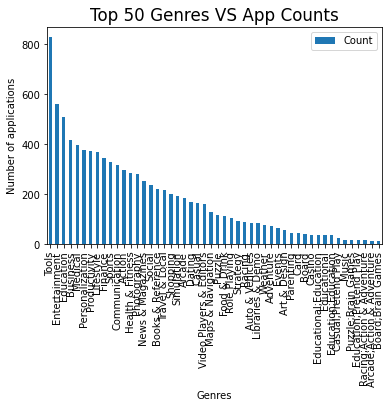

In [280]:
top_50_genres[['Genres','Count']].set_index('Genres').plot(kind='bar')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rc('font', size=14) 
plt.xticks(rotation=90)
plt.title('Top 50 Genres VS App Counts')
plt.ylabel('Number of applications')
plt.xlabel('Genres')

Text(0.5, 0, 'Genres')

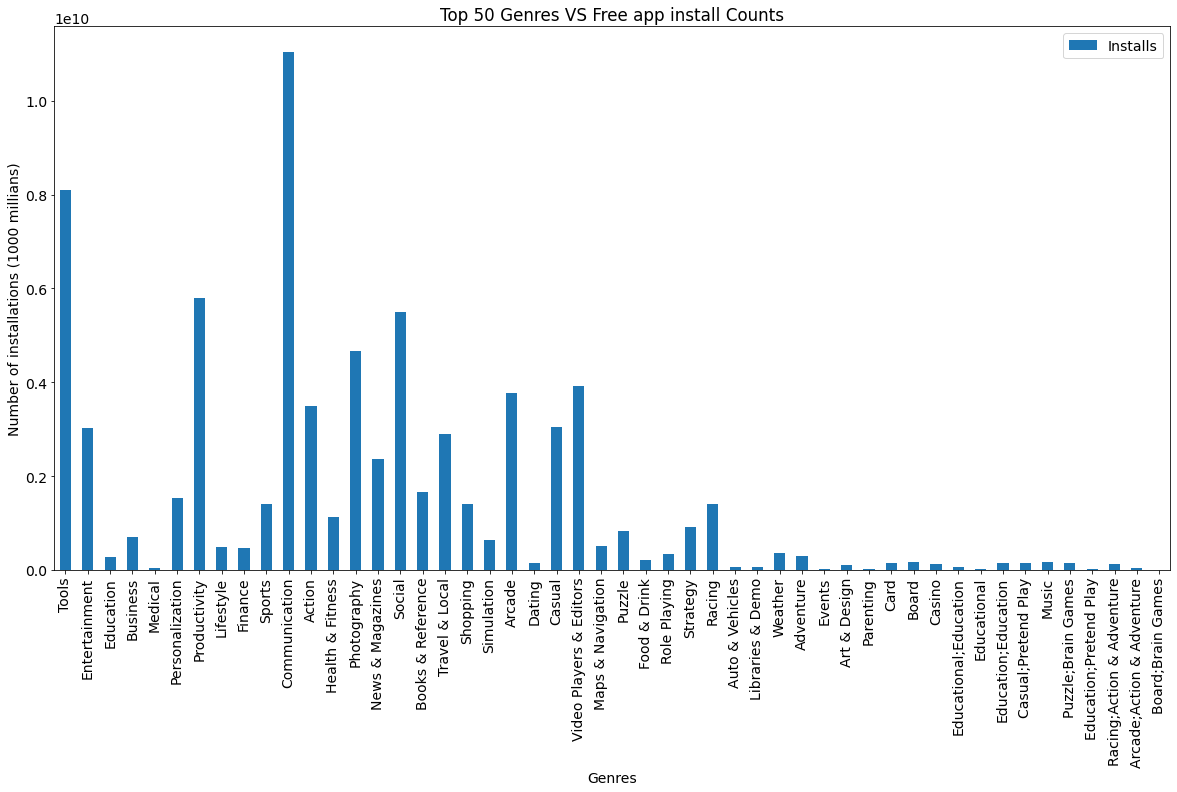

In [281]:
top_50_genres[['Genres','Installs']].set_index('Genres').plot(kind='bar')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rc('font', size=14) 
plt.xticks(rotation=90)
plt.title('Top 50 Genres VS Free app install Counts')
plt.ylabel('Number of installations (1000 millians)')
plt.xlabel('Genres')

Text(0.5, 0, 'Genres')

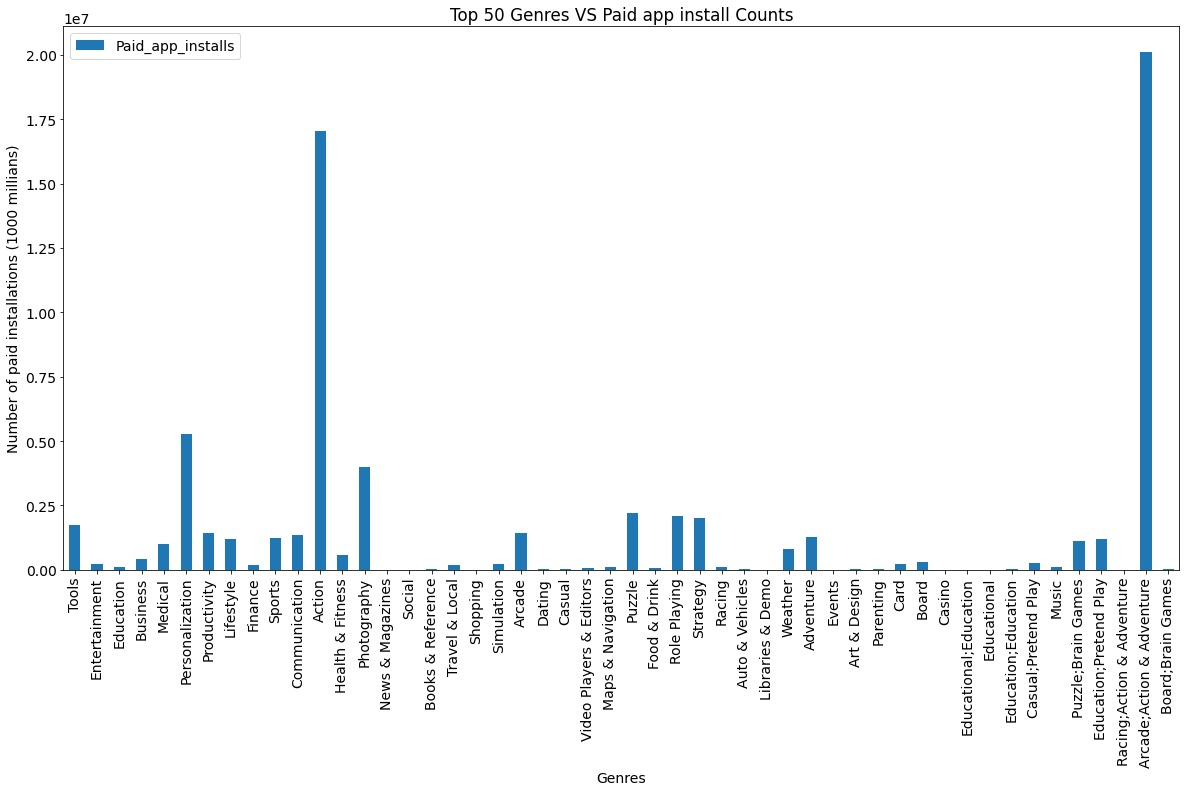

In [282]:
top_50_genres[['Genres','Paid_app_installs']].set_index('Genres').plot(kind='bar')
plt.title('Top 50 Genres VS Paid app install Counts')
plt.ylabel('Number of paid installations (1000 millians)')
plt.xlabel('Genres')

In [283]:
categoty_type_installs = playstore_df.groupby(['Category','Type'])[['Installs']].sum().unstack().reset_index()
categoty_type_installs = categoty_type_installs[~categoty_type_installs['Installs']['Paid'].isna()].set_index('Category')
categoty_type_installs

Installs            
Type                         Free        Paid
Category                                     
ART_AND_DESIGN       1.243221e+08     16000.0
AUTO_AND_VEHICLES    5.308006e+07     50150.0
BOOKS_AND_REFERENCE  1.921446e+09     23316.0
BUSINESS             1.001502e+09    412775.0
COMMUNICATION        3.264592e+10   1360050.0
DATING               2.642895e+08     21350.0
EDUCATION            8.708500e+08    602000.0
ENTERTAINMENT        2.868960e+09    200000.0
EVENTS               1.597316e+07         1.0
FAMILY               1.022699e+10  31271814.0
FINANCE              8.764631e+08    185602.0
FOOD_AND_DRINK       2.738388e+08     60000.0
GAME                 3.506492e+10  21099965.0
HEALTH_AND_FITNESS   1.582498e+09    574110.0
LIBRARIES_AND_DEMO   6.299581e+07       100.0
LIFESTYLE            5.364644e+08   1179110.0
MAPS_AND_NAVIGATION  7.241608e+08    121100.0
MEDICAL              5.223740e+07   1020033.0
NEWS_AND_MAGAZINES   7.496312e+09      5500.0
PARENTING            3.147101e+07     50100.0
PERSONALIZATION      2.320236e+09   5258794.0
PHOTOGRAPHY          1.008427e+10   3978740.0
PRODUCTIVITY         1.417468e+10   1412055.0
SHOPPING             3.247839e+09     10100.0
SOCIAL               1.406986e+10      6000.0
SPORTS               1.749931e+09   1243815.0
TOOLS                1.145104e+10   1727441.0
TRAVEL_AND_LOCAL     6.868704e+09    183060.0
VIDEO_PLAYERS        6.221932e+09     71000.0
WEATHER              4.252885e+08    812000.0

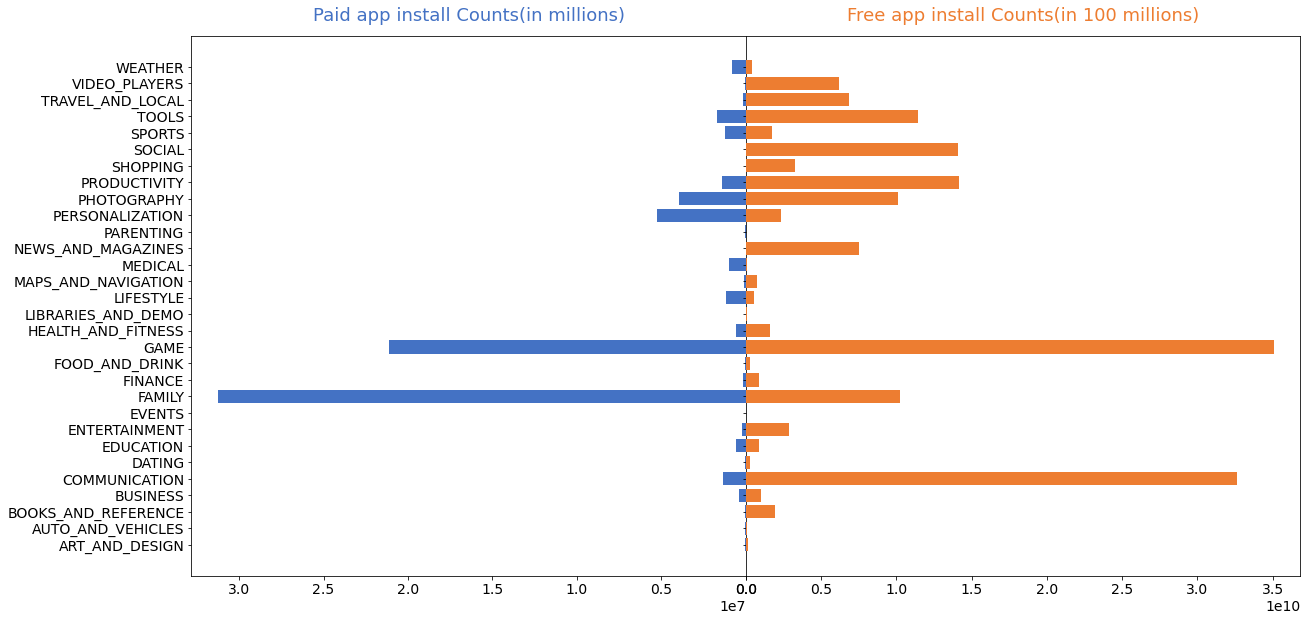

In [284]:
color_red = '#4472c4'
color_blue = '#ed7d31'

ind = categoty_type_installs.index
column0 = categoty_type_installs['Installs']['Paid']
column1 = categoty_type_installs['Installs']['Free']
title0 = 'Paid app install Counts(in millions)'
title1 = 'Free app install Counts(in 100 millions)'

fig, axes = plt.subplots(figsize=(20,10), ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(ind, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red)
axes[1].barh(ind, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue)
    
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 

# To show data from highest to lowest
# plt.gca().invert_yaxis()
axes[0].set(yticks=ind, yticklabels=ind)
axes[0].yaxis.tick_left()

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

In [285]:
# plot(kind='scatter', x='a', y='b');

Text(0.5, 1.0, 'Histogram of Rating')

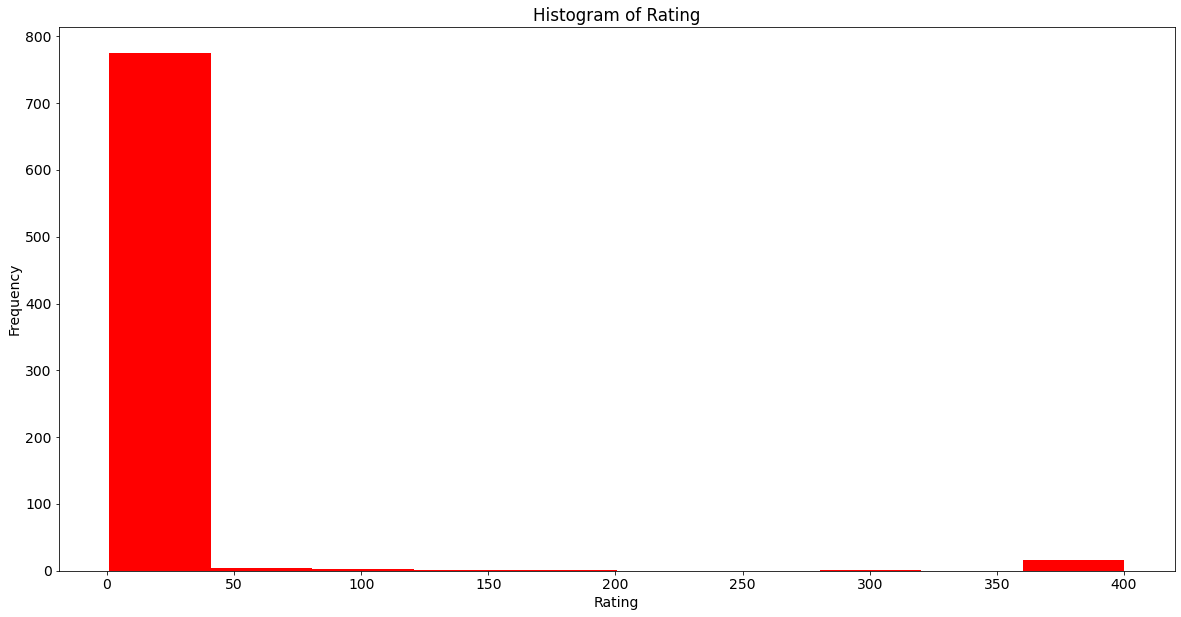

In [286]:
price = playstore_df[~playstore_df['Price'].isna() & playstore_df['Price'] != 0]['Price']
plt.hist(price.values, color='Red')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Rating')

Text(0.5, 0, 'Genres')

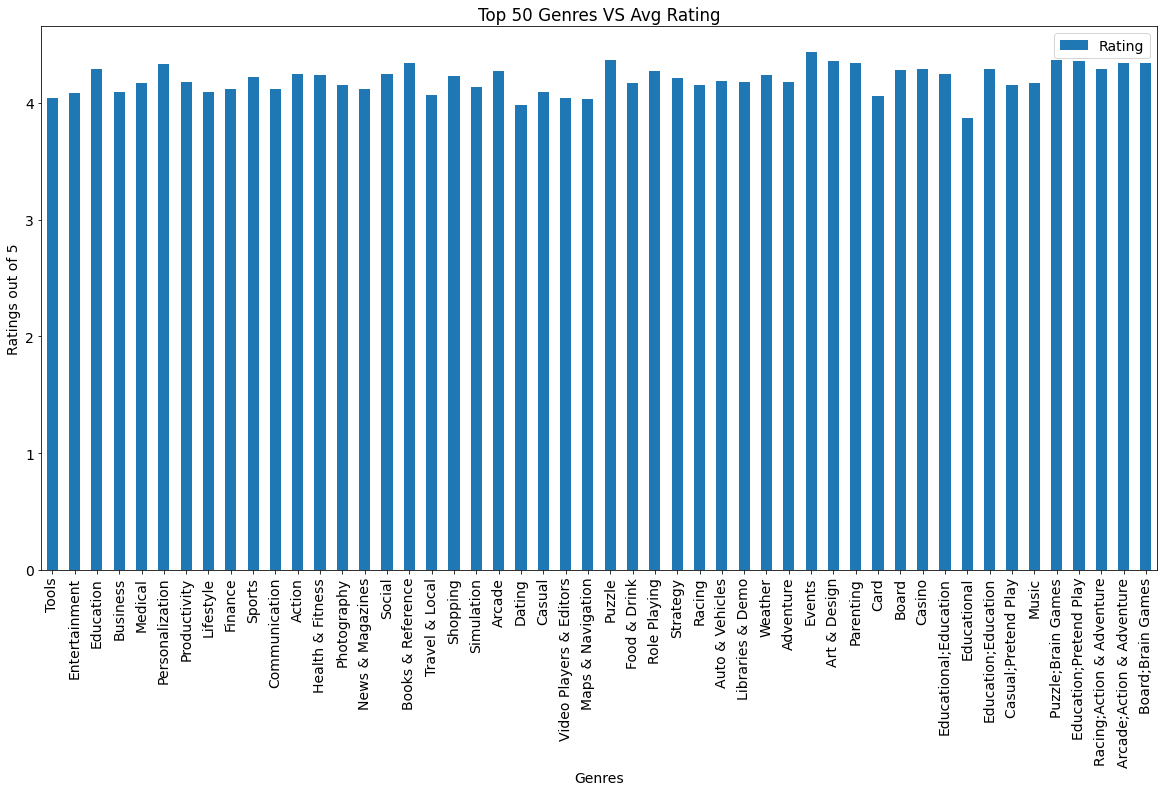

In [287]:
top_50_genres[['Genres','Rating']].set_index('Genres').plot(kind='bar')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rc('font', size=14) 
plt.xticks(rotation=90)
plt.title('Top 50 Genres VS Avg Rating')
plt.ylabel('Ratings out of 5')
plt.xlabel('Genres')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


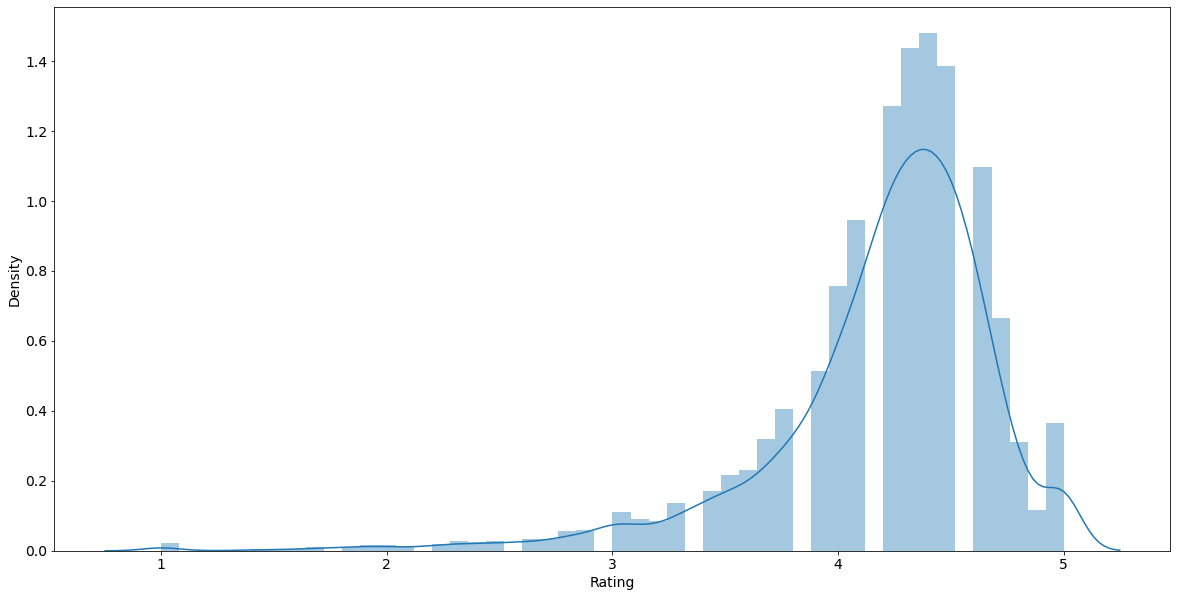

In [288]:
rating = playstore_df[~playstore_df['Rating'].isna()]['Rating']
# plt.hist(rating.values, color='green')
# plt.xlabel('Rating')
# plt.ylabel('Frequency')
# plt.title('Histogram of Rating')
sns.distplot(rating, hist=True)

In [289]:
playstore_df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

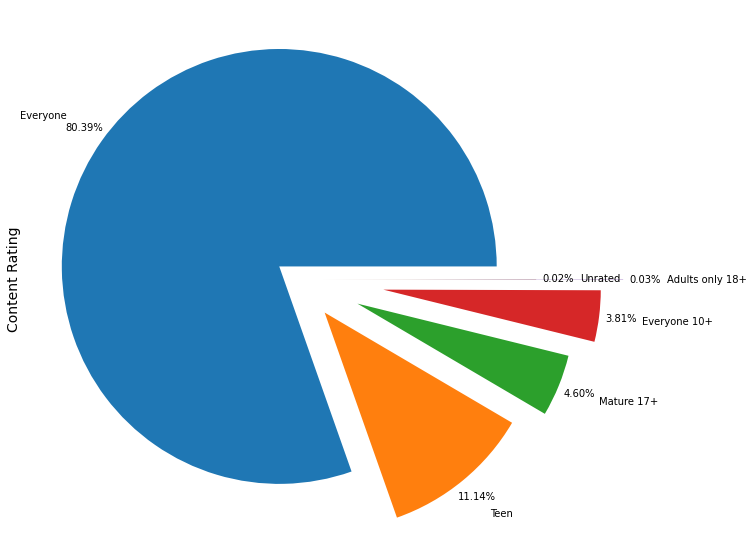

In [290]:
playstore_df['Content Rating'].value_counts().plot(kind='pie', fontsize=10, explode= (0.1,0.2,0.3,0.4,0.5,0.1), autopct='%1.2f%%', pctdistance=1.1, labeldistance=1.2)
# .Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [291]:
top_downloaded_apps = playstore_df.groupby('App').tail(1).sort_values(['Installs','Rating'], ascending=False).head(50)
top_10_downloaded_apps = top_downloaded_apps.head(10).set_index('App')[['Rating','Reviews']].sort_values(['Reviews'])

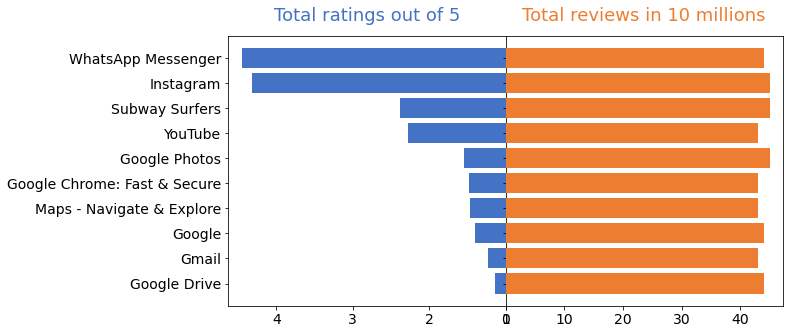

In [292]:
color_red = '#4472c4'
color_blue = '#ed7d31'

ind = top_10_downloaded_apps.index
column0 = top_10_downloaded_apps['Reviews']
column1 = top_10_downloaded_apps['Rating']
title0 = 'Total ratings out of 5'
title1 = 'Total reviews in 10 millions'

fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(ind, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red)
axes[1].barh(ind, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue)
    
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 

# To show data from highest to lowest
# plt.gca().invert_yaxis()
axes[0].set(yticks=ind, yticklabels=ind)
axes[0].yaxis.tick_left()
# axes[0].tick_params(axis='y', colors='white') # tick color
# axes[0].set_xticks([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])
# axes[0].set_lim([0,5])

axes[0].set_xticklabels([1, 2, 3, 4, 5])
axes[1].set_xticklabels([0, 10, 20, 30, 40, 50])

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
